In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Численное решение дифференциальных уравнений

## Метод Эйлера (частный случай формулы Рунге-Кутта)
$$ y'=f(x,y), \; y(x_0)=y_0 $$ 
$$ y_{i+1}=y_i+h \cdot f(x_i,y_i) $$ 
$$ h=\frac{b-a}{n} $$ 

In [2]:
def euler(a, b, func, n, y_init):
    x = np.linspace(a, b, n)
    y = [0] * n
    y[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        y[i + 1] = y[i] + func(x[i], y[i]) * h
    
    return x, y

## Метод Рунге-Кутта
$$ y'=f(x,y) $$ 
$$ y_{i+1}=y_i+\frac{h}{6} (k_1+2k_2+2k_3+k_4) $$ 
$$ k_1=f(x_i,y_i) \cdot h $$ 
$$ k_2=f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 
$$ k_3=f(x_i+\frac{h}{2},y_i+\frac{k_2}{2}) \cdot h $$ 
$$ k_4=f(x_i+h,y_i+k_3) \cdot h $$ 
В методе Рунге-Кутта мы воспользуемся
$$ y_{i+1}=y_i+f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 

In [3]:
def runge(a, b, func, n, y_init):
    x = np.linspace(a, b, n)
    y = [0] * n
    y[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        k = func(x[i], y[i]) * h
        y[i + 1] = y[i] + func(x[i] + h / 2, y[i] + k / 2) * h
    
    return x, y

### Сравнить решения методом Эйлера и Рунге-Кутта:
$$ y'=y+x, \; y(0)=0, \; x \in [0,2] $$ 

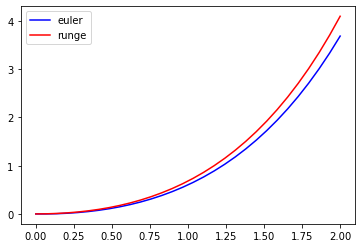

In [4]:
def func_1(x, y):
    return y + x

n = 30

args_1, vals_1 = euler(0, 2, func_1, n=n, y_init=0)
plt.plot(args_1, vals_1, color='b', label='euler')

args_2, vals_2 = runge(0, 2, func_1, n=n, y_init=0)
plt.plot(args_2, vals_2, color='r', label='runge')

plt.legend()
plt.show()

### Сравнить решения методом Эйлера и Рунге-Кутта:
$$ y'=y-\frac{2x}{y}, \; y(0)=1, \; x \in [0,40] $$ 

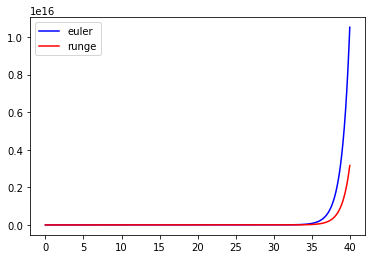

In [5]:
def func_2(x, y):
    return y - 2 * x / y

n = 1000

args_1, vals_1 = euler(0, 40, func_2, n=n, y_init=1)
plt.plot(args_1, vals_1, color='b', label='euler')

args_2, vals_2 = runge(0, 40, func_2, n=n, y_init=1)
plt.plot(args_2, vals_2, color='r', label='runge')

plt.legend()
plt.show()

### Сравнить решения методом Эйлера и Рунге-Кутта:
$$ y'=x^2-2y, \; y(0)=1, \; x \in [0,10] $$ 

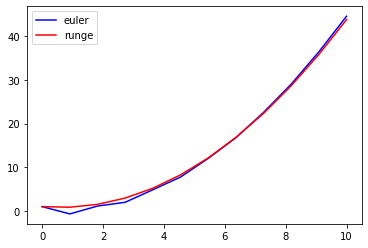

In [6]:
def func_3(x, y):
    return x ** 2 - 2 * y

n = 12

args_1, vals_1 = euler(0, 10, func_3, n=n, y_init=1)
plt.plot(args_1, vals_1, color='b', label='euler')

args_2, vals_2 = runge(0, 10, func_3, n=n, y_init=1)
plt.plot(args_2, vals_2, color='r', label='runge')

plt.legend()
plt.show()

## Метод Рунге-Кутта второго порядка
(с выбором коэффициентов)
$$ y'=f(x,y), \; y(x_{0})=y_{0} $$ 
$$ y_{i+1}=y_{i}+C_{1} k_{1_{i}} + C_{2} k_{2_{i}} $$ 
$$ k_{1_{i}}=f(x_{i-1},y_{i-1}) \cdot h $$ 
$$ k_{2_{i}}=f(x_{i-1}+ \alpha_{2} h,y_{i-1}+ \beta_{21} k_{1_{i}}) \cdot h $$ 
$$ C_{1}+C_{2}=1 \Rightarrow C_{1}=1-C_{2} $$ 
$$ \alpha_{2}=\beta_{21}=\frac{1}{2 C_{2}} $$ 

In [7]:
def runge_kutta(a, b, func, n, y_init, c_2):
    c_1 = 1 - c_2
    alpha = beta = 1 / (2 * c_2)
    h = abs(b - a) / n

    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init

    for i in range(1, n):
        k_1 = func(x[i - 1], y[i - 1]) * h
        k_2 = func(x[i - 1] + alpha * h, y[i - 1] + beta * k_1) * h
        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + c_1 * k_1 + c_2 * k_2

    return x, y

## Функция потерь
$$ loss= \sum_{i=1}^{n} ({y_{i}}^{*} - y_{i})^{2} $$ 

In [8]:
def loss(actual_y, test_y):
    s = 0
    for i, j in zip(actual_y, test_y):
        s += (i - j) ** 2
    return s

### Решить уравнение:
$$ y'=y-\frac{2x}{y}, \; y(0)=1, \; x \in [0, 10], \; n=100 $$ 
*Аналитически:*
$$ y=\sqrt{2x+1} $$ 

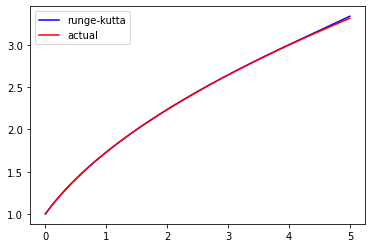

Потеря при c_2=1/2: 0.03164038371063933


In [9]:
def func_4(x, y):
    return y - 2 * x / y


def actual_4(x):
    return np.sqrt(2 * x + 1)


args, vals = runge_kutta(a=0, b=5, func=func_4, y_init=1, n=1000, c_2=0.5)
plt.plot(args, vals, color='b', label='runge-kutta')

actual_vals = [actual_4(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

plt.legend()
plt.show()

print('Потеря при c_2=1/2:', loss(actual_vals, vals))

## Метод Рунге-Кутта третьего порядка
(с выбором коэффициентов)
$$ y' = f(x, y), \; y(x_0) = y_0 $$ 
$$ y_i = y_{i-1} + C_1 k_1 + C_2 k_2 + C_3 k_3  $$ 
$$ k_1 = f(x_{i-1}, y_{i-1}) \cdot h $$ 
$$ k_2 = f(x_{i-1} + \alpha_2 h, y_{i-1} + \beta_{21} k_1) \cdot h $$ 
$$ k_3 = f(x_{i-1} + \alpha_3 h, y_{i-1} + \beta_{31} k_1 + \beta_{32} k_2) \cdot h $$ 
Коэффициенты:
$$ C_2 = \frac{\frac{1}{2} \alpha_3 - \frac{1}{3}}{\alpha_2 (\alpha_3 - \alpha_2)} $$ 
$$ C_3 = \frac{\frac{1}{2} - C_2 \alpha_2}{\alpha_3} $$ 
$$ C_1 + C_2 + C_3 = 1 \Rightarrow C_1 = 1 - C_2 - C_3 $$
$$ \beta_{21} = \alpha_2 $$ 
$$ C_3 \beta_{32} \alpha_2 = \frac{1}{6} \Rightarrow \beta_{32} = \frac{1}{6 \alpha_2 C_3} $$ 
$$ \beta_{31} + \beta_{32} = \alpha_3 \Rightarrow \beta_{31} = \alpha_3 - \beta_{32} $$ 

In [10]:
def runge_kutta_3(a, b, func, n, y_init, a_2, a_3):
    h = abs(b - a) / n
    
    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init
    
    c_2 = (1/2 * a_3 - 1/3) / (a_2 * (a_3 - a_2))
    c_3 = (1/2 - c_2 * a_2) / a_3
    c_1 = 1 - c_2 - c_3
    b_21 = a_2
    b_32 = 1 / (6 * a_2 * c_3)
    b_31 = a_3 - b_32
    
    for i in range(1, n):
        k_1 = func(x[i-1], y[i-1]) * h
        k_2 = func(x[i-1] + a_2 * h, y[i-1] + b_21 * k_1) * h
        k_3 = func(x[i-1] + a_3 * h, y[i-1] + b_31 * k_1 + b_32 * k_2) * h
        x[i] = x[i-1] + h
        y[i] = y[i-1] + c_1 * k_1 + c_2 * k_2 + c_3 * k_3
    
    return x, y

### Задание:
Сравнить ошибку метода Рунге-Кутта третьего порядка для разных коэффициентов альфа для четырёх дифференциальных уравнений из примеров ниже.

Коэффициенты для сравнения:

$$ \alpha_2=\frac{1}{2}, \; \alpha_3=1 $$ 
$$ \alpha_2=1, \; \alpha_3=\frac{1}{2} $$ 
$$ \alpha_2=\frac{1}{3}, \; \alpha_3=\frac{2}{3} $$ 

#### Пример 1. $$ y'=y \cdot tg(x)+sin(x),\; y(0)=0, \; x \in [0;1,5] $$ 
*Аналитически:*
$$ y=\frac{1-cos(2x)}{4 cos(x)} $$ 

Потеря для первых альфа: 6.838219755350097e-10
Потеря для вторых альфа: 9.015828394750318e-11
Потеря для третьих альфа: 5.757164333348504e-06


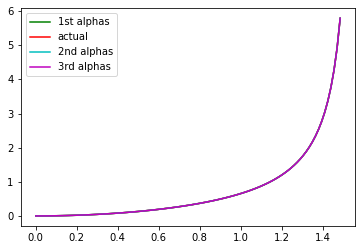

In [11]:
def func_5(x, y):
    return y * np.tan(x) + np.sin(x)


def actual_5(x):
    return (1 - np.cos(2 * x)) / (4 * np.cos(x))


n = 100
a = 0
b = 1.5

args, vals = runge_kutta_3(a, b, func_5, n, y_init=0, a_2=1/2, a_3=1)
plt.plot(args, vals, color='g', label='1st alphas')

actual_vals = [actual_5(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

print('Потеря для первых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(a, b, func_5, n, y_init=0, a_2=1, a_3=1/2)
plt.plot(args, vals, color='c', label='2nd alphas')
print('Потеря для вторых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(a, b, func_5, n, y_init=0, a_2=1/3, a_3=2/3)
plt.plot(args, vals, color='m', label='3rd alphas')
print('Потеря для третьих альфа:', loss(actual_vals, vals))

plt.legend()
plt.show()

#### Пример 2. $$ y'=\frac{3y-2xy^2}{x}, \; y(1)=1, \; x \in [1;6] $$ 
*Аналитически:*
$$ y=\frac{1}{\frac{x}{2}+\frac{x^3}{2}} $$ 

Потеря для первых альфа: 286.51141225348806
Потеря для вторых альфа: 286.51140377317216
Потеря для третьих альфа: 286.51141001783986


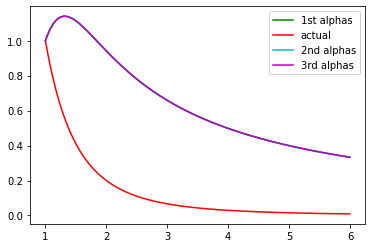

In [12]:
def func_6(x, y):
    return (3 * y - 2 * x * y ** 2) / x


def actual_6(x):
    return 1 / (x / 2 + (x ** 3) / 2)


n = 1000
a = 1
b = 6

args, vals = runge_kutta_3(a, b, func_6, n, 1, a_2=1/2, a_3=1)
plt.plot(args, vals, color='g', label='1st alphas')

actual_vals = [actual_6(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

print('Потеря для первых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(a, b, func_6, n, 1, a_2=1, a_3=1/2)
plt.plot(args, vals, color='c', label='2nd alphas')
print('Потеря для вторых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(a, b, func_6, n, 1, a_2=1/3, a_3=2/3)
plt.plot(args, vals, color='m', label='3rd alphas')
print('Потеря для третьих альфа:', loss(actual_vals, vals))

plt.legend()
plt.show()

#### Пример 3. $$ y'=y-\frac{2x}{y}, \; y(0)=1, \; x \in [0;5] $$ 
*Аналитически:*
$$ y=\sqrt{2x+1} $$ 

Потеря для первых альфа: 0.000390145992918952
Потеря для вторых альфа: 0.024686660666774298
Потеря для третьих альфа: 0.0010443120441664142


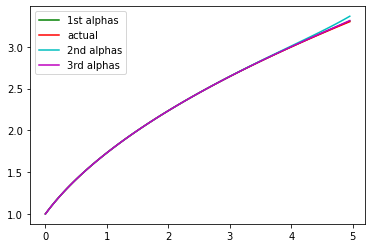

In [13]:
n = 100

args, vals = runge_kutta_3(0, 5, func_4, n, 1, a_2=1/2, a_3=1)
plt.plot(args, vals, color='g', label='1st alphas')

actual_vals = [actual_4(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

print('Потеря для первых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(0, 5, func_4, n, 1, a_2=1, a_3=1/2)
plt.plot(args, vals, color='c', label='2nd alphas')
print('Потеря для вторых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(0, 5, func_4, n, 1, a_2=1/3, a_3=2/3)
plt.plot(args, vals, color='m', label='3rd alphas')
print('Потеря для третьих альфа:', loss(actual_vals, vals))

plt.legend()
plt.show()

#### Пример 4. $$ y'=\frac{x^2 y^2-2y}{2x}, \; y(1)=1, \; x \in [1;1,5] $$ 
*Аналитически:*
$$ y=\frac{1}{\frac{3}{2}x-\frac{1}{2}x^2} $$ 

Потеря для первых альфа: 4.994294701926686e-16
Потеря для вторых альфа: 9.734836502327693e-16
Потеря для третьих альфа: 2.3753565124033764e-16


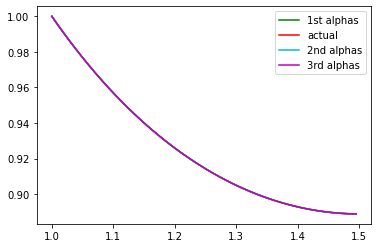

In [14]:
def func_7(x, y):
    return ((x ** 2) * (y ** 2) - 2 * y) / (2 * x)


def actual_7(x):
    return 1 / ((3 / 2) * x - (1 / 2) * (x ** 2))


n = 100
a = 1
b = 1.5
y_init = 1

args, vals = runge_kutta_3(a, b, func_7, n, y_init, a_2=1/2, a_3=1)
plt.plot(args, vals, color='g', label='1st alphas')

actual_vals = [actual_7(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

print('Потеря для первых альфа:', loss(actual_vals, vals))

args, vals = runge_kutta_3(a, b, func_7, n, y_init, a_2=1, a_3=1/2)
print('Потеря для вторых альфа:', loss(actual_vals, vals))
plt.plot(args, vals, color='c', label='2nd alphas')

args, vals = runge_kutta_3(a, b, func_7, n, y_init, a_2=1/3, a_3=2/3)
print('Потеря для третьих альфа:', loss(actual_vals, vals))
plt.plot(args, vals, color='m', label='3rd alphas')

plt.legend()
plt.show()

## Метод Рунге-Кутта четвёртого порядка
(с выбором коэффициентов)
$$ y'=f(x,y), \; y(x_0)=y_0 $$ 
$$ y_i=y_{i-1}+C_1k_1+C_2k_2+C_3k_3+C_4k_4 $$ 
$$ k_1=f(x_0,y_0) \cdot h $$ 
$$ k_2=f(x_0+\alpha_2 h,y_0+\beta_{21}k_1) \cdot h $$ 
$$ k_3=f(x_0+\alpha_3 h,y_0+\beta_{31}k_1+\beta_{32}k_2) \cdot h $$ 
$$ k_4=f(x_0+\alpha_4 h,y_0+\beta_{41}k_1+\beta_{42}k_2+\beta_{43}k_3) \cdot h $$ 
Коэффициенты:
$$ C_1=1-C_2-C_3-C_4 $$ 
$$ C_2=\frac{2\alpha_3-1}{12\alpha_2(\alpha_3-\alpha_2)(1-\alpha_3)} $$ 
$$ C_3=\frac{-(2\alpha_2-1)}{12\alpha_3(1-\alpha_2)(1-\alpha_3)} $$ 
$$ C_4=\frac{6\alpha_2\alpha_3-4\alpha_2-4\alpha_3+3}{12(1-\alpha_2)(1-\alpha_3)} $$ 
$$ \beta_{21}=\alpha_2 $$ 
$$ \beta_{31}=\alpha_3-\beta_{32} $$ 
$$ \beta_{32}=\frac{1}{24C_4\beta_{43}\alpha_2} $$ 
$$ \beta_{41}=1-\beta_{42}-\beta_{43} $$ 
$$ \beta_{42}=-\frac{4\alpha_3^2-\alpha_2-5\alpha_3+2}{24C_4\alpha_3(\alpha_3-\alpha_2)} $$ 
$$ \beta_{43}=\frac{1-2\alpha_2}{24C_4\alpha_3(\alpha_3-\alpha_2)} $$ 

In [15]:
def runge_kutta_4(a, b, func, n, init, a2, a3, a4):
    h = abs(b - a) / n
    
    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = init
    
    c2 = (2 * a3 - 1) / (12 * a2 * (a3 - a2) * (1 - a3))
    c3 = -(2 * a2 - 1) / (12 * a3 * (1 - a2) * (1 - a3))
    c4 = (6 * a2 * a3 - 4 * a2 - 4 * a3 + 3) / (12 * (1 - a2) * (1 - a3))
    c1 = 1 - c2 - c3 - c4
    b21 = a2
    b43 = (1 - 2 * a2) / (24 * c4 * a3 * (a3 - a2))
    b32 = 1 / (24 * c4 * b43 * a2)
    b31 = a3 - b32
    b42 = -(4 * a3 ** 2 - a2 - 5 * a3 + 2) / (24 * c4 * a3 * (a3 - a2)) 
    b41 = 1 - b42 - b43
    
    for i in range(1, n):
        k1 = func(x[i-1], y[i-1]) * h
        k2 = func(x[i-1] + a2 * h, y[i-1] + b21 * k1) * h
        k3 = func(x[i-1] + a3 * h, y[i-1] + b31 * k1 + b32 * k2) * h
        k4 = func(x[i-1] + a4 * h, y[i-1] + b41 * k1 + b42 * k2 + b43 * k3) * h
        x[i] = x[i-1] + h
        y[i] = y[i-1] + c1 * k1 + c2 * k2 + c3 * k3 + c4 * k4
    
    return x, y

### Решить уравнение:
$$ y'=y-\frac{2x}{y}, \; y(0)=1, \; x \in [0;5] $$ 
Выбрав коэффициенты:
$$ \alpha_2=1, \; \alpha_3=\frac{1}{2}, \; \alpha_4=1 $$ 
*Аналитическое решение:*
$$ y=\sqrt{2x+1} $$ 

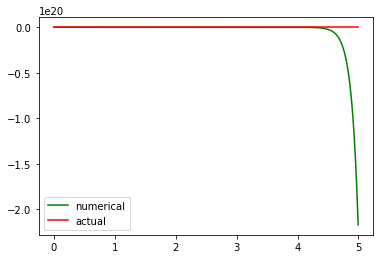

In [21]:
n = 1000
a = 0
b = 5
y_init = 1

args, vals = runge_kutta_4(a, b, func_4, n, y_init, a2=1, a3=1/2, a4=1)
plt.plot(args, vals, color='g', label='numerical')

actual_vals = [actual_4(arg) for arg in args]
plt.plot(args, actual_vals, color='r', label='actual')

plt.legend()
plt.show()